# Support Vector Machine classifier


In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

dataset = pd.read_csv("data.csv", na_values=["'NAN'"])
dataset = dataset.fillna(dataset.mean())

print(dataset.dtypes)
print(dataset.describe())

dataset.columns = [
    'Lamda_MAX_(micrometros)', 'Lamda_MIN_(micrometros)',
    'Delta_Lamda_(rmse)', 'Radial Velocity (km s-1)', 'Delta_rv(ABSFERR)',
    'Tempeartura_(Kelvin)', 'Delta_Temperatura', 'Tipo_de_Estrella', 'Archivo'
]

'Lamda_MAX_(micrometros)'     float64
'Lamda_MIN_(micrometros)'     float64
'Delta_Lamda_(rmse)'          float64
'Radial Velocity (km s-1)'    float64
'Delta_rv(ABSFERR)'           float64
'Tempeartura_(Kelvin)'        float64
'Delta_Temperatura'           float64
'Tipo_de_Estrella'             object
'Archivo'                      object
dtype: object
       'Lamda_MAX_(micrometros)'  'Lamda_MIN_(micrometros)'  \
count                 281.000000                 281.000000   
mean                    4.330896                   0.812946   
std                     1.002834                   0.024338   
min                     2.410840                   0.801935   
25%                     4.109770                   0.806027   
50%                     4.942140                   0.808192   
75%                     5.033480                   0.810740   
max                     5.456760                   0.935314   

       'Delta_Lamda_(rmse)'  'Radial Velocity (km s-1)'  'Delta_rv(ABSFERR)'

In [20]:
# import SVM algorithm, preprecessing tool and metrics tools 
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset[[
        'Lamda_MAX_(micrometros)',
        'Lamda_MIN_(micrometros)',
        'Delta_Lamda_(rmse)',
        'Radial Velocity (km s-1)',
        'Delta_rv(ABSFERR)',
        'Tempeartura_(Kelvin)',
        'Delta_Temperatura'
    ]],
    dataset['Tipo_de_Estrella'],
    test_size=0.3,
    random_state=42
)

labels = np.unique(dataset['Tipo_de_Estrella'])
print(labels)

['C' 'F' 'G' 'K' 'L' 'M' 'S' 'T']


In [22]:
clf = svm.SVC(
    kernel='rbf',
    # probability=True
)

#Train the model using the training sets
clf.fit(X_train, y_train)

# #Predict the response for test dataset
y_pred = clf.predict(X_test)

X_test['preds'] = y_pred

['F' 'G' 'K' 'M']


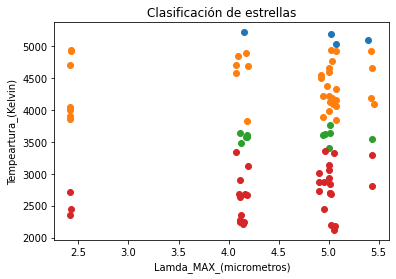

In [23]:
# Gráfica temperatura vs logitud de onda máxima
classes = np.unique(y_pred)
print(classes)
colors = sns.color_palette()

fig, ax = plt.subplots()


for i, c in enumerate(classes):
    data = X_test.loc[X_test['preds'] == c]
    ax.scatter(
        'Lamda_MAX_(micrometros)',
        'Tempeartura_(Kelvin)',
        data=data,
        color=colors[i],
        label=y_pred
    )

ax.set_title("Clasificación de estrellas")
ax.set_xlabel('Lamda_MAX_(micrometros)')
ax.set_ylabel('Tempeartura_(Kelvin)')

plt.show()



In [25]:
# Matriz de confusión
print("Matriz de confusión: \n", metrics.confusion_matrix(y_test, y_pred, labels=labels))

# Acurracy
print("\nAccuracy:\n", metrics.accuracy_score(y_test, y_pred))

# Recall
print("\nRecall:\n", metrics.recall_score(y_test, y_pred, average='micro'))

# Precisión
print("\nPrecision:\n", metrics.precision_score(y_test, y_pred, average='micro'))

# # AUC/ROC
# print("\nAUC:\n", metrics.roc_auc_score(
#     y_test,
#     clf.predict_proba(X_test),
#     multi_class='ovr',
#     labels=labels
# ))


Matriz de confusión: 
 [[ 0  0  0  1  0  1  0  0]
 [ 0  4 11  0  0  0  0  0]
 [ 0  0 17  1  0  0  0  0]
 [ 0  0  8  8  0  4  0  0]
 [ 0  0  0  0  0  3  0  0]
 [ 0  0  0  1  0 24  0  0]
 [ 0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  1  0  0]]

Accuracy:
 0.6235294117647059

Recall:
 0.6235294117647059

Precision:
 0.6235294117647059
